In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1)/255 # (48000,28,28,1) 크기 
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                             padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

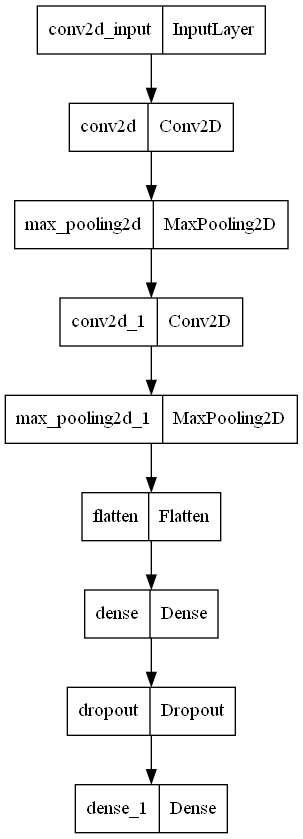

In [7]:
keras.utils.plot_model(model)

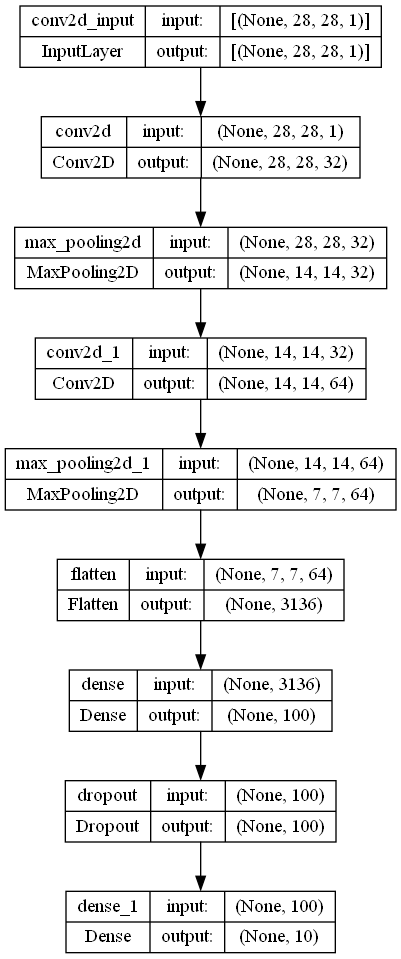

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.5134 - accuracy: 0.8172 - val_loss: 0.3269 - val_accuracy: 0.8787
Epoch 2/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.3407 - accuracy: 0.8778 - val_loss: 0.2778 - val_accuracy: 0.8949
Epoch 3/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2884 - accuracy: 0.8957 - val_loss: 0.2551 - val_accuracy: 0.9037
Epoch 4/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2574 - accuracy: 0.9069 - val_loss: 0.2569 - val_accuracy: 0.9047
Epoch 5/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2327 - accuracy: 0.9147 - val_loss: 0.2437 - val_accuracy: 0.9093
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2147 - accuracy: 0.9205 - val_loss: 0.2275 - val_accuracy: 0.9144
Epoch 7/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1981 - accuracy: 0.9268 - val_loss: 0.2372 -

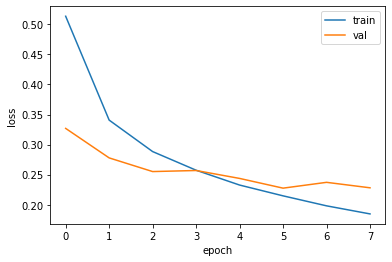

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 7ms/step - loss: 0.2275 - accuracy: 0.9144


[0.22752802073955536, 0.9144166707992554]

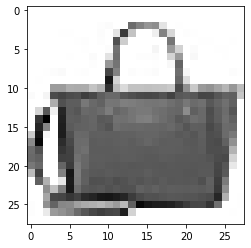

In [14]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1]) 
# predict()는 첫 번째 차원이 배치 차원으로 기대해 슬라이싱 연산자를 사용하기
print(preds)

1/1 [==============================] - 0s 86ms/step
[[2.3559830e-12 1.1687849e-21 2.0091877e-16 4.3281711e-15 4.3431743e-14
  2.4640514e-13 1.1769274e-14 5.1620932e-15 1.0000000e+00 3.5546131e-14]]


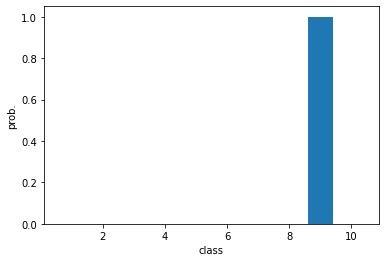

In [16]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠','스니커즈', '가방', '앵클부츠']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1,28,28,1)/255

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2433 - accuracy: 0.9095


[0.24329262971878052, 0.909500002861023]